In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
data = pd.read_csv("spam.csv", encoding='latin-1')

print("Dataset shape:", data.shape)
data.head()


Dataset shape: (5572, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data = data[['v1', 'v2']]
data.columns = ['label', 'message']
data.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.info()
data.isnull().sum()
data['label'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


label
ham     4825
spam     747
Name: count, dtype: int64

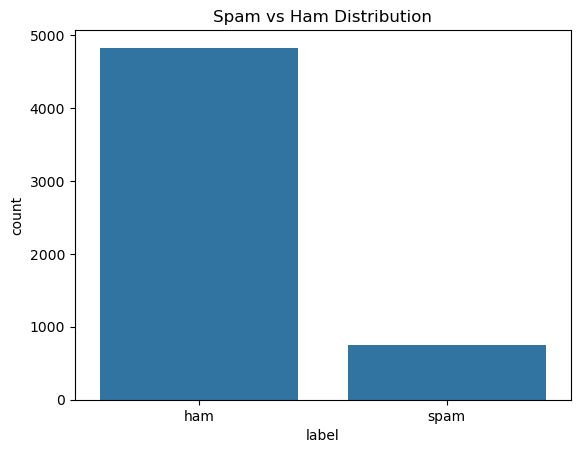

In [5]:
sns.countplot(x='label', data=data)
plt.title("Spam vs Ham Distribution")
plt.show()


In [6]:
data['label'] = data['label'].map({'ham': 0, 'spam': 1})
data.head()


,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
X = data['message']
y = data['label']

print(X.shape, y.shape)


(5572,) (5572,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print(X_train.shape, X_test.shape)


(4179,) (1393,)


In [9]:
vectorizer = TfidfVectorizer(stop_words='english')

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [10]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)


,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [11]:
y_pred = model.predict(X_test_tfidf)

In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.9662598707824839
Classification Report:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1202
           1       1.00      0.75      0.86       191

    accuracy                           0.97      1393
   macro avg       0.98      0.88      0.92      1393
weighted avg       0.97      0.97      0.96      1393



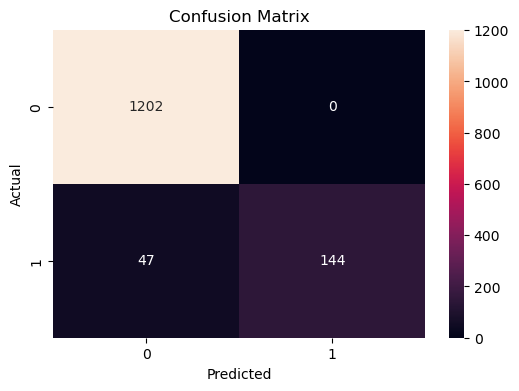

In [13]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [14]:
sample_sms = ["Congratulations! You have won a free lottery ticket"]

sample_vector = vectorizer.transform(sample_sms)
prediction = model.predict(sample_vector)

if prediction[0] == 1:
    print("Spam Message")
else:
    print("Ham (Not Spam)")


Ham (Not Spam)
